# Crop Recommendation System for Nigerian Farmers
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade

## Project Overview
This project aims to develop a **machine learning-based crop recommendation system** that assists Nigerian farmers in selecting the most suitable crops for their land based on soil properties, climatic conditions, and rainfall patterns. The system leverages precision agriculture data to optimize crop yield, reduce losses, and support sustainable farming practices.

## Project Workflow

1. **Problem Definition**
   - Nigerian farmers face challenges in selecting appropriate crops due to variability in soil fertility, temperature, rainfall, and humidity.
   - Goal: Recommend crops that maximize yield and minimize losses.

2. **Data Collection**
   - Dataset includes soil nutrients (N, P, K), temperature, humidity, pH, rainfall, and crop type labels.
   - Data derived from augmented precision agriculture datasets.

3. **Data Preprocessing**
   - Handling missing values and outliers.
   - Feature scaling and encoding.
   - Splitting data into training, validation, and test sets.

4. **Exploratory Data Analysis (EDA)**
   - Analyze feature distributions and correlations.
   - Identify key factors influencing crop selection.

5. **Machine Learning Model Selection**
   - Evaluate multiple algorithms: Decision Trees, Random Forest, Gradient Boosting, SVM, and Neural Networks.
   - Select models based on accuracy, interpretability, and robustness.

6. **Model Training and Validation**
   - Use cross-validation and hyperparameter tuning.
   - Assess performance with accuracy, precision, recall, F1-score, and confusion matrix.

7. **Model Interpretability**
   - Explain predictions using feature importance, SHAP values, and LIME.
   - Ensure transparency for farmer adoption.

8. **Deployment**
   - Build a user-friendly interface (web or desktop app) for farmers.
   - Provide visual dashboards showing recommended crops and supporting insights.

9. **Best Practices**
   - Maintain documentation and version control.
   - Collaborate with agricultural experts and stakeholders.
   - Continuously monitor and update the model to adapt to changing conditions.

10. **Ethical Considerations**
    - Protect farmer data privacy.
    - Ensure fairness and accessibility in recommendations.
    - Assess socioeconomic impact to support smallholder farmers.

---

This notebook will guide the entire process **from raw data preprocessing to deployment**, providing a practical, interpretable, and effective crop recommendation solution for Nigerian farmers.


In [1]:
# Cell 2: Import Libraries and Setup Paths

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Interpretability
import shap
import lime
import lime.lime_tabular

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")

# Paths (adjust according to your project structure)
DATA_PATH = r"C:\Users\AKINMADE FARUQ\Downloads\PROJECT MATERIALS\My Projects\GITHUB\Crop recommendation for farmers"     
ARTIFACTS_DIR = "artifacts"           # Directory to save models, plots, etc.
MODELS_DIR = "models"                 # Directory to save trained models

# Create directories if they don't exist
import os
os.makedirs(ARTIFACTS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)

print("Libraries imported and directories set up successfully.")


Libraries imported and directories set up successfully.


In [2]:
# Cell 3: Load Dataset and Initial Inspection

# Load the dataset
try:
    df = pd.read_csv("Crop_recommendation.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: Dataset not found at {DATA_PATH}. Please check the path.")

# Display the first 5 rows
df.head()


Dataset loaded successfully.


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
# Basic information about the dataset
df.info()

# Summary statistics for numerical features
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
# Cell 4: Data Preprocessing

# Copy dataset to avoid modifying original
data = df.copy()

# 1. Handling missing values
# Check if there are any missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# For simplicity, fill missing numerical values with median
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in numerical_features:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# 2. Encode the target variable (crop type)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# 3. Feature scaling
scaler = StandardScaler()
X = data.drop('label', axis=1)
y = data['label']

X_scaled = scaler.fit_transform(X)

# 4. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Data preprocessing completed successfully.")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Missing values per column:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
Data preprocessing completed successfully.
Training set size: 1760 samples
Test set size: 440 samples


In [11]:
# Cell 4: Data Preprocessing

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and test sets (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Check shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (1540, 7), (1540,)
Validation set: (330, 7), (330,)
Test set: (330, 7), (330,)


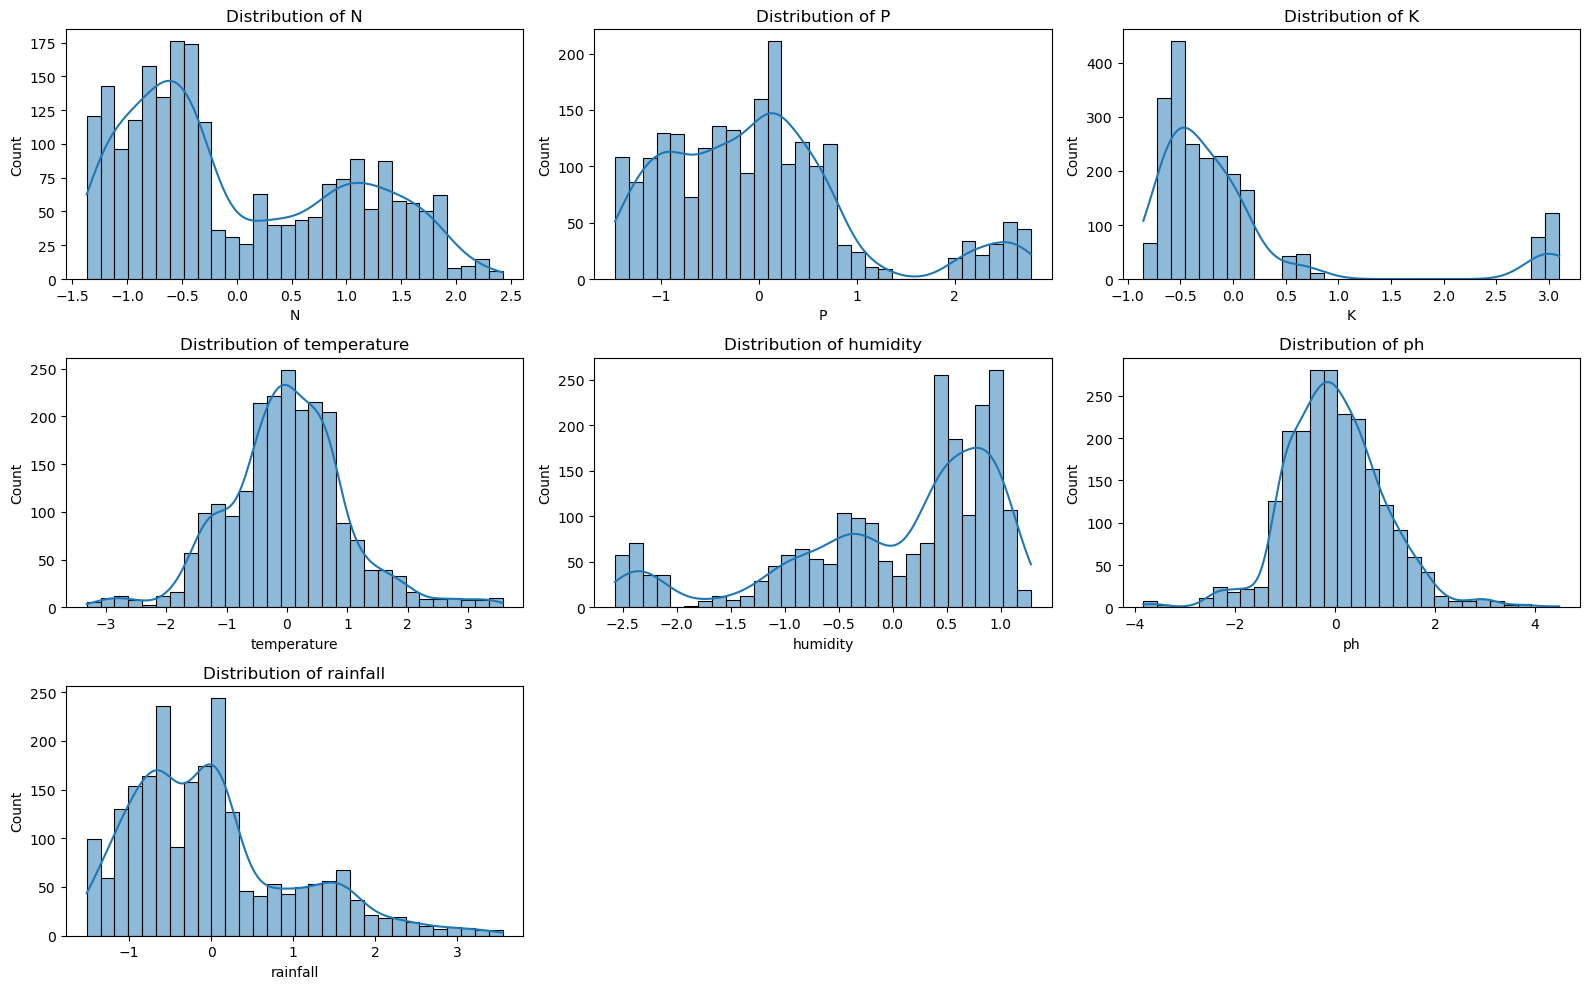

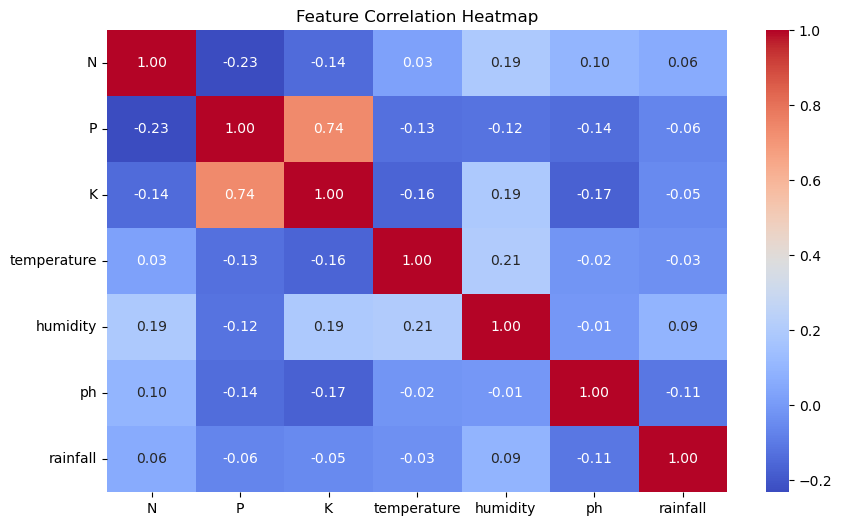

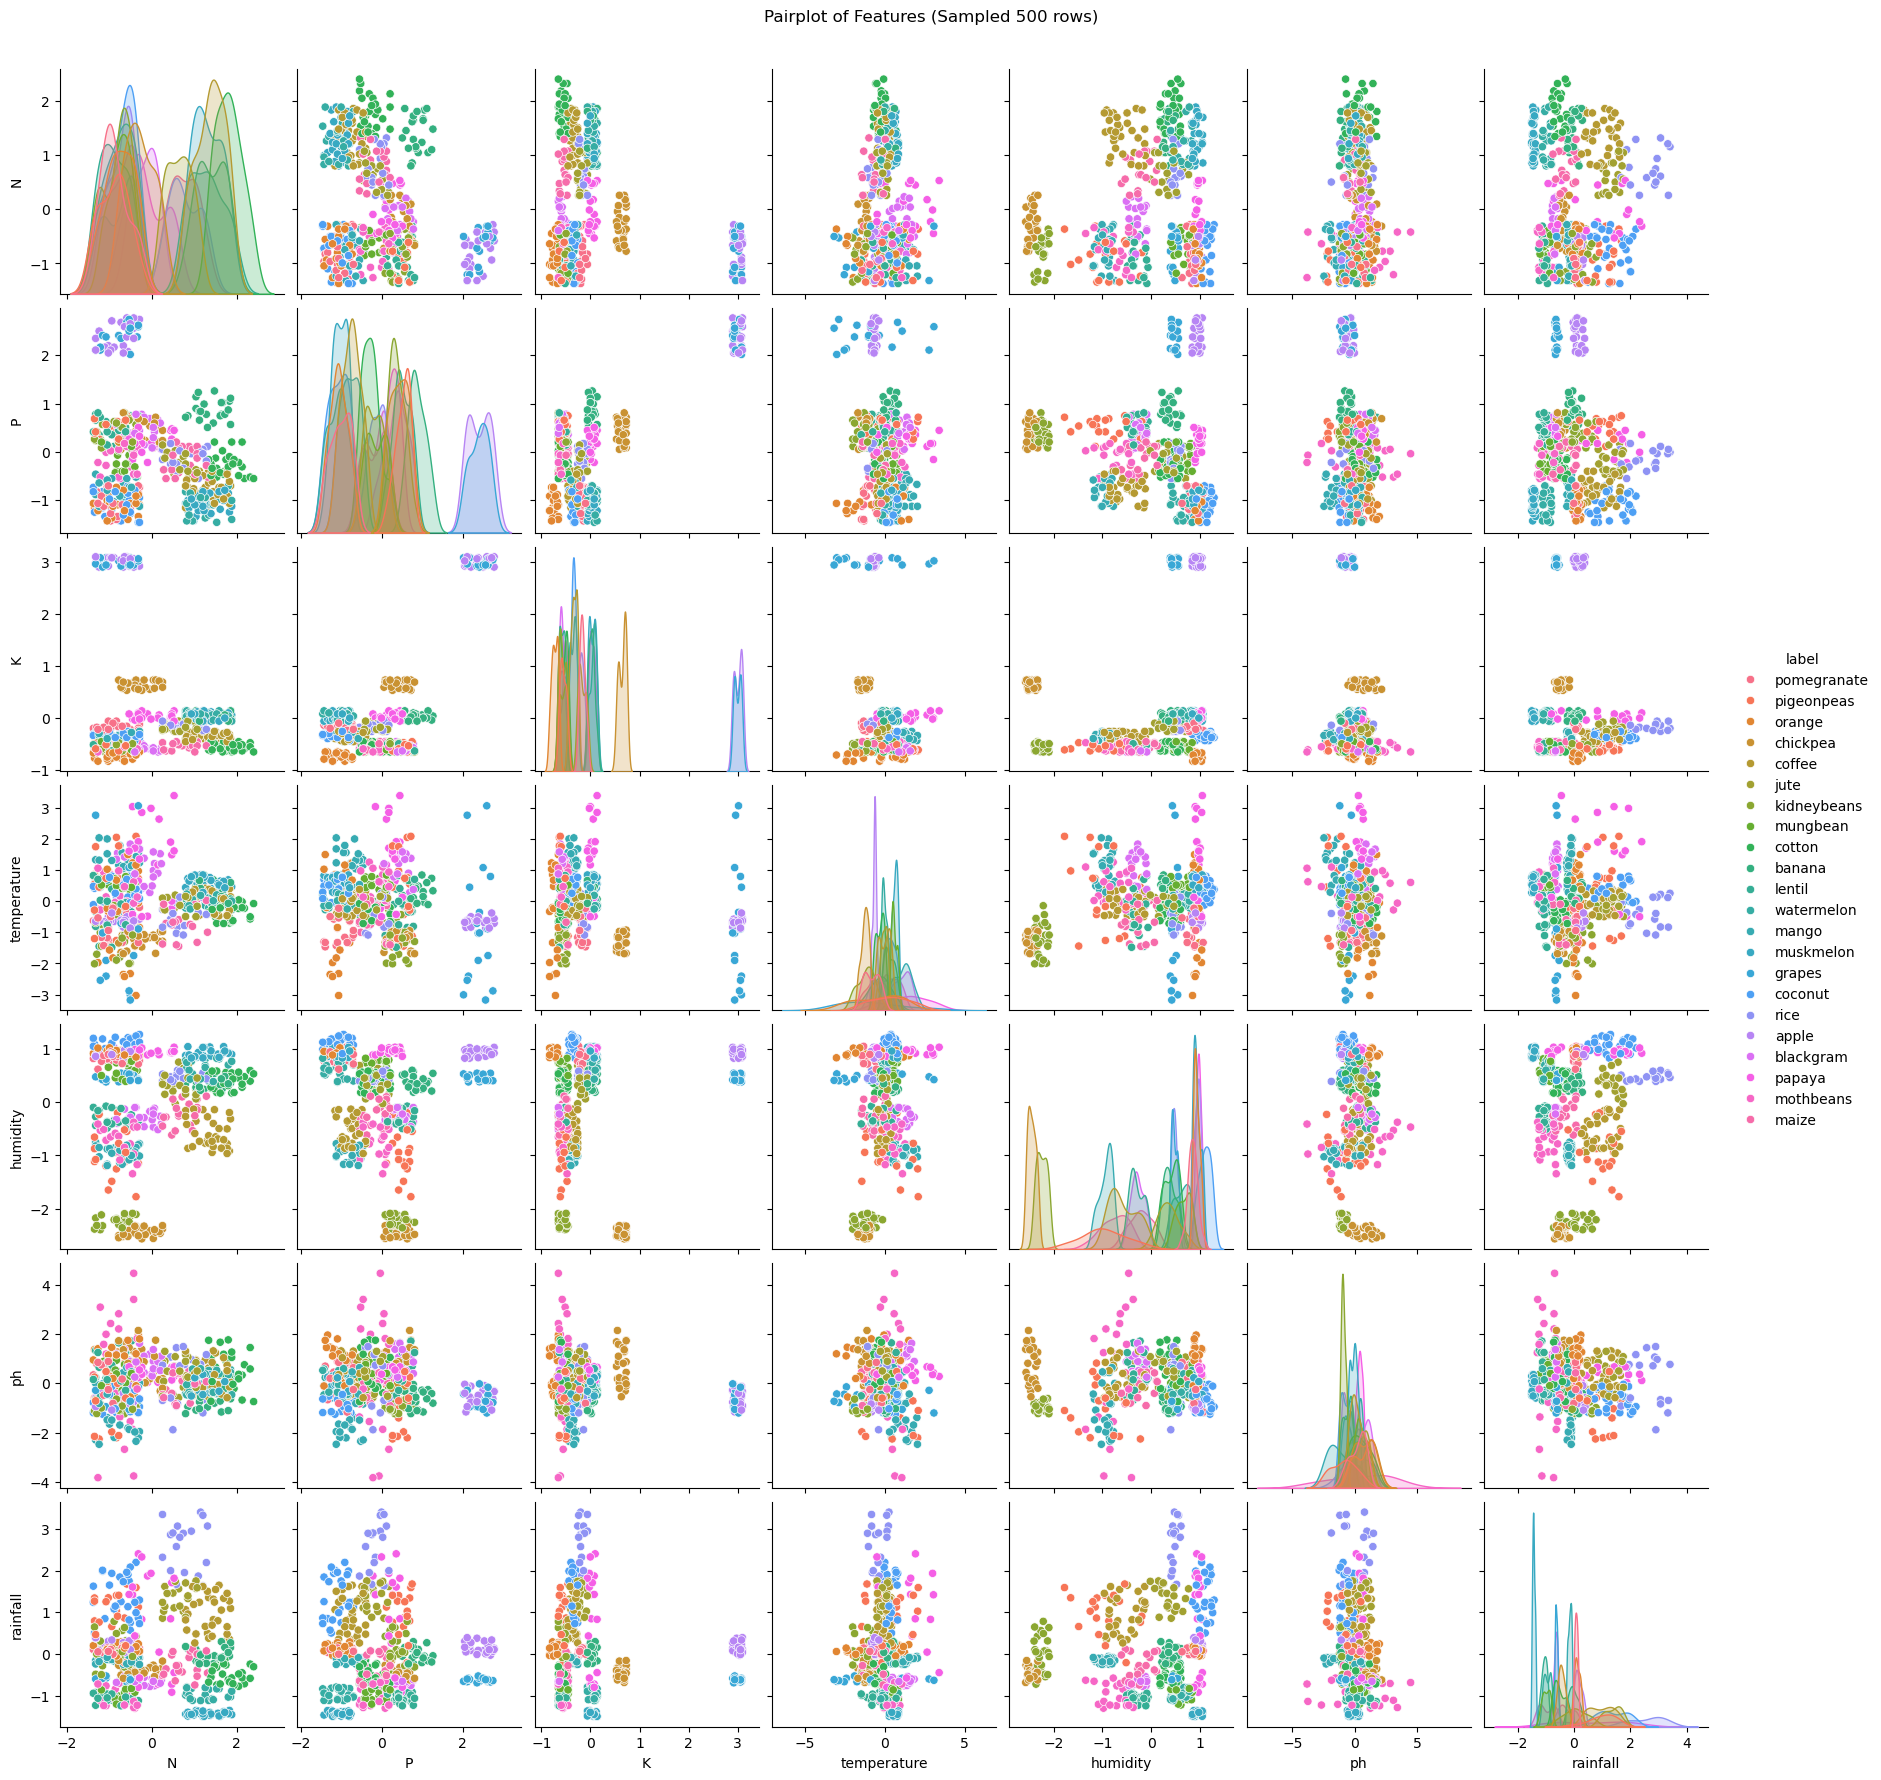

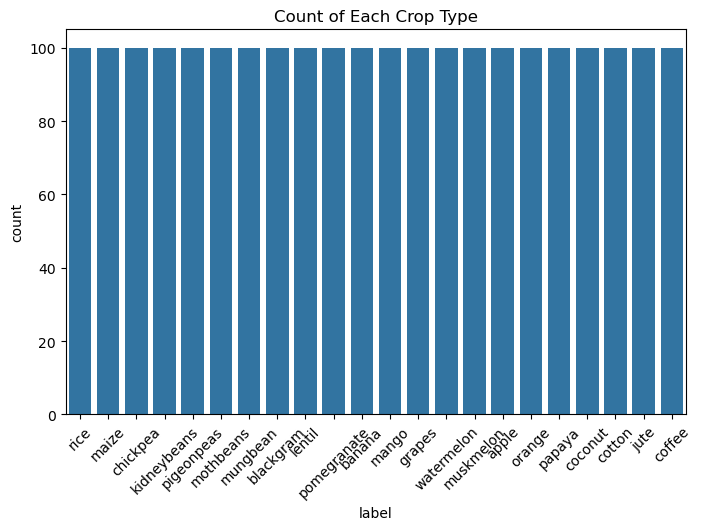

In [13]:
# Cell 5 : Exploratory Data Analysis (EDA)

# Convert scaled features back to a DataFrame for easier visualization
X_df = pd.DataFrame(X_scaled, columns=X.columns)
X_df['label'] = y.values

# 1. Distribution of each feature
plt.figure(figsize=(16, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(X_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# 2. Correlation heatmap (exclude 'label')
plt.figure(figsize=(10, 6))
sns.heatmap(X_df[X.columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Pairplot (sampled to speed up visualization)
sns.pairplot(X_df.sample(500), hue='label')
plt.suptitle("Pairplot of Features (Sampled 500 rows)", y=1.02)
plt.show()

# 4. Count of each crop type
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=X_df)
plt.title("Count of Each Crop Type")
plt.xticks(rotation=45)
plt.show()


Validation Accuracy: 0.9757575757575757

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       0.93      0.93      0.93        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15
           8       0.93      0.87      0.90        15
           9       1.00      1.00      1.00        15
          10       0.88      0.93      0.90        15
          11       0.94      1.00      0.97        15
          12       1.00      1.00      1.00        15
          13       0.92      0.80      0.86        15
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        15
          16    

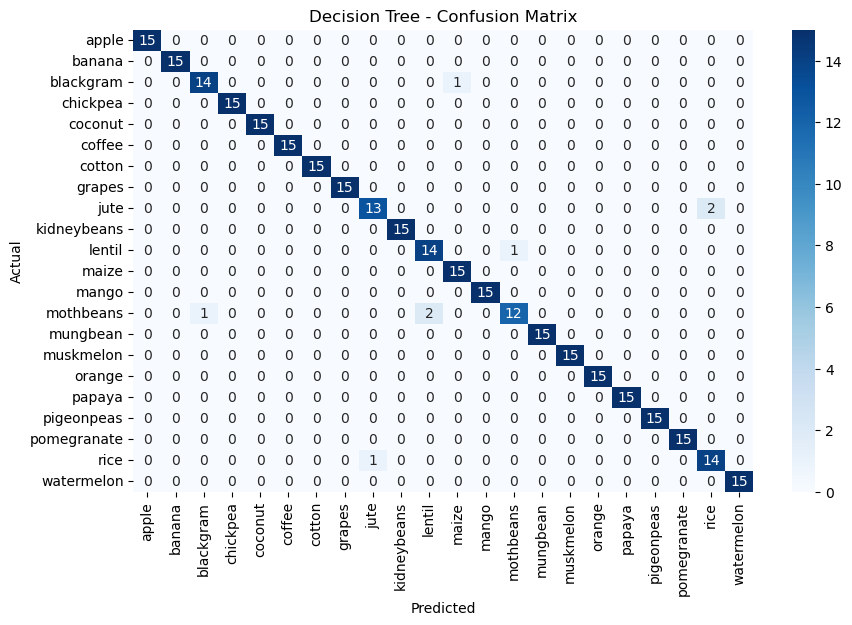

In [14]:
# Cell 6: Model Training - Decision Tree


# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = dt_model.predict(X_val)

# Evaluate performance
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


Random Forest Validation Accuracy: 0.990909090909091

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15
           8       0.94      1.00      0.97        15
           9       1.00      1.00      1.00        15
          10       1.00      0.93      0.97        15
          11       0.94      1.00      0.97        15
          12       1.00      1.00      1.00        15
          13       0.94      1.00      0.97        15
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        15
   

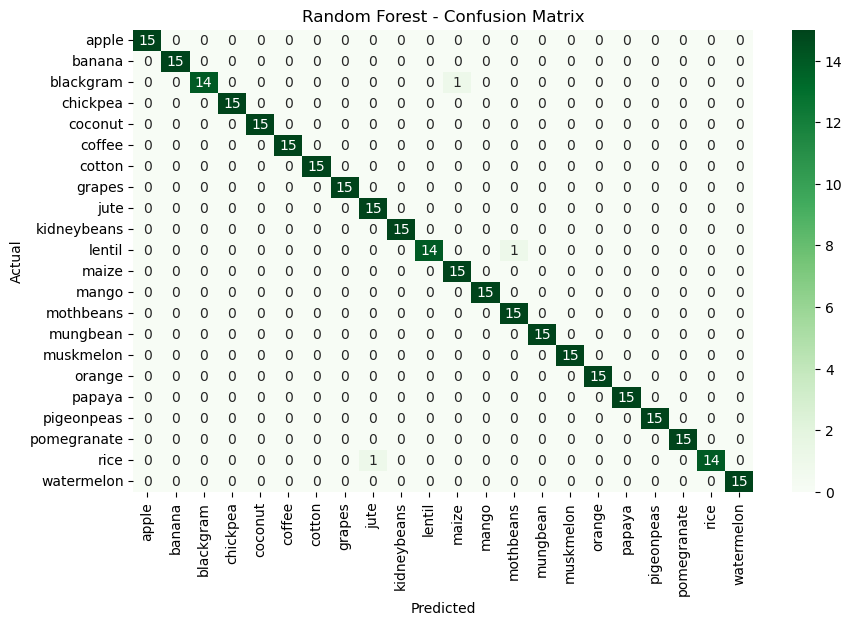

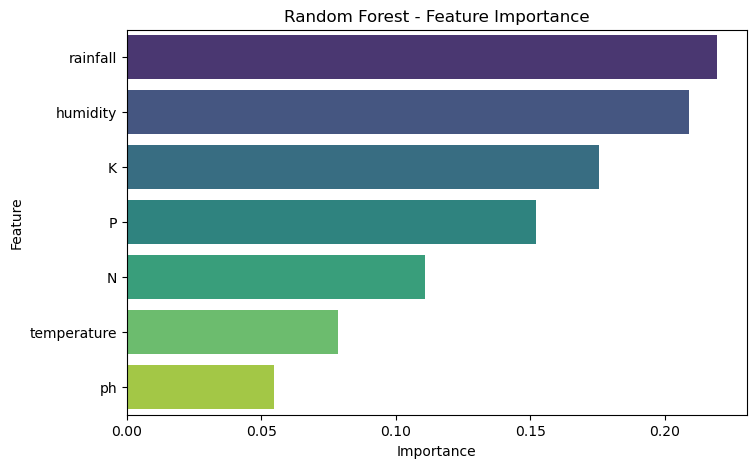

In [15]:
# Cell 7: Model Training - Random Forest

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=200,       # Number of trees
    max_depth=None,         # Allow full depth
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred_rf = rf_model.predict(X_val)

# Evaluate performance
print("Random Forest Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Random Forest - Feature Importance")
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.9954545454545455
Validation Accuracy (Tuned RF): 0.990909090909091

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        15
           8       0.94      1.00      0.97        15
           9       1.00      1.00      1.00        15
          10       1.00      0.93      0.97        15
          11       0.94      1.0

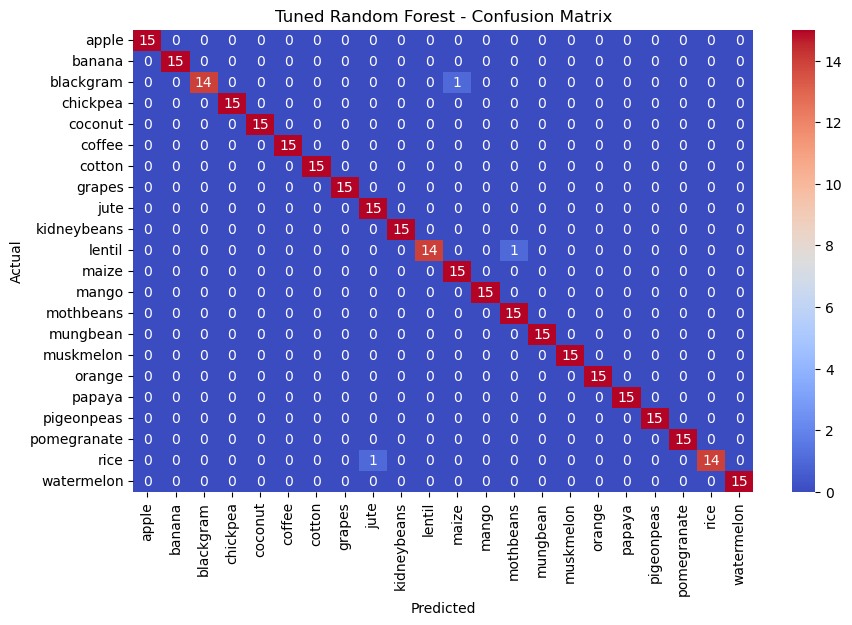

In [16]:
# Cell 8: Hyperparameter Tuning - Random Forest

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit GridSearch to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train Random Forest with best parameters
best_rf_model = grid_search.best_estimator_

# Evaluate on validation set
y_val_pred_best = best_rf_model.predict(X_val)
print("Validation Accuracy (Tuned RF):", accuracy_score(y_val, y_val_pred_best))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_best))

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_val, y_val_pred_best)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Tuned Random Forest - Confusion Matrix')
plt.show()


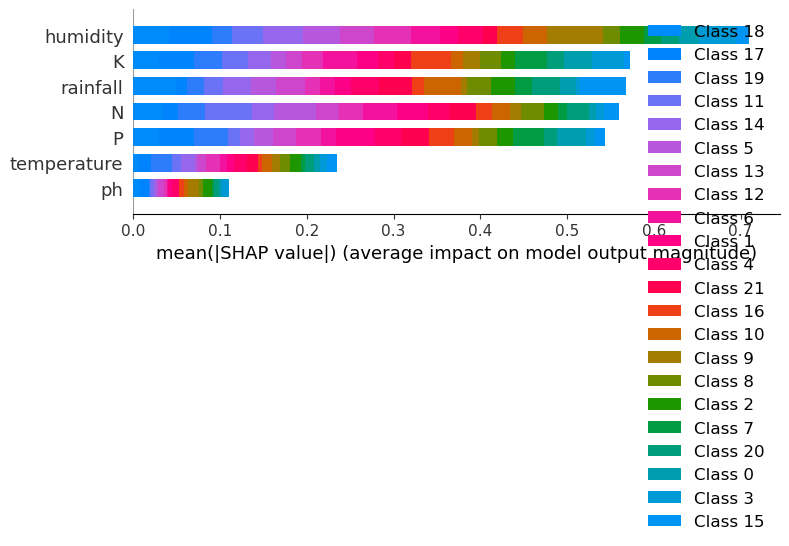

IndexError: index 15 is out of bounds for axis 1 with size 7

<Figure size 640x480 with 0 Axes>

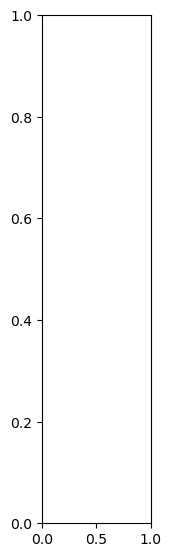

In [17]:
# Cell 9: Model Interpretability - SHAP

import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_val)

# Summary plot for all classes
plt.figure()
shap.summary_plot(shap_values, X_val, feature_names=X.columns, plot_type="bar")
plt.show()

# Detailed summary plot (beeswarm)
plt.figure()
shap.summary_plot(shap_values, X_val, feature_names=X.columns)
plt.show()

# Optional: explain a single prediction
index = 0  # Change index to any sample from validation set
print(f"Actual Crop: {label_encoder.inverse_transform([y_val[index]])[0]}")
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][index], X_val[index], feature_names=X.columns)


Test Set Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        15
        jute       1.00      1.00      1.00        15
 kidneybeans       1.00      1.00      1.00        15
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      1.00      1.00        15
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00

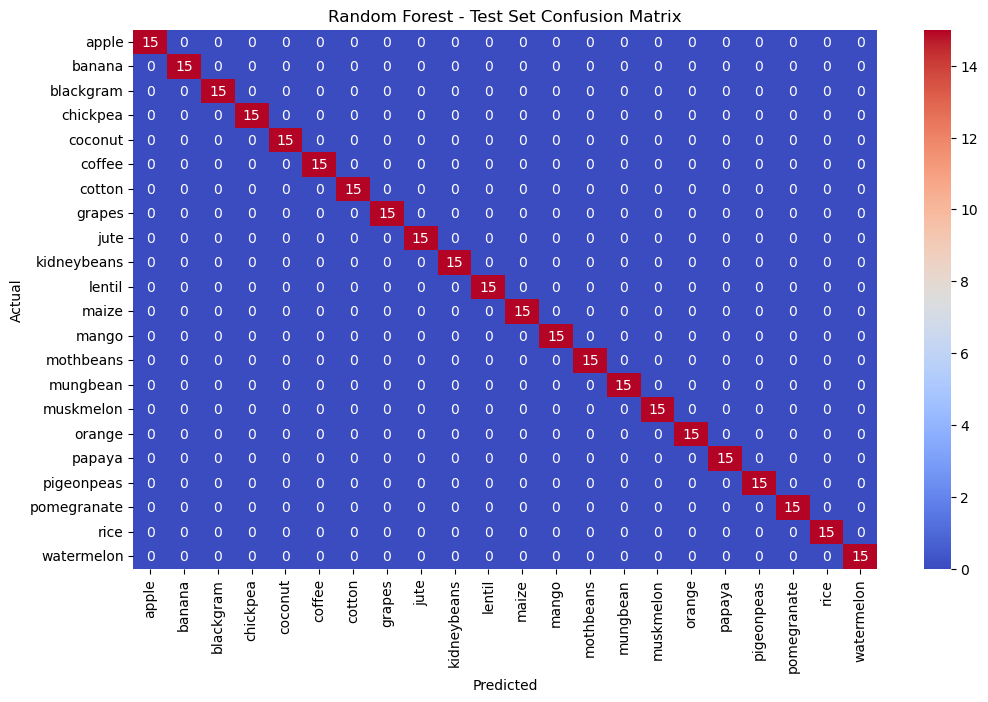

In [18]:
# Cell 10: Final Evaluation on Test Set

# Predict on the test set
y_test_pred = best_rf_model.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Accuracy:", test_accuracy)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12, 7))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest - Test Set Confusion Matrix')
plt.show()


In [19]:
# Cell 11: Save Model and Preprocessing Objects

import joblib
import os

# Define file paths
model_path = os.path.join(MODELS_DIR, "random_forest_crop_model.pkl")
scaler_path = os.path.join(MODELS_DIR, "scaler.pkl")
label_encoder_path = os.path.join(MODELS_DIR, "label_encoder.pkl")

# Save the Random Forest model
joblib.dump(best_rf_model, model_path)
print(f"Random Forest model saved to {model_path}")

# Save the StandardScaler
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# Save the LabelEncoder
joblib.dump(label_encoder, label_encoder_path)
print(f"Label encoder saved to {label_encoder_path}")


Random Forest model saved to models\random_forest_crop_model.pkl
Scaler saved to models\scaler.pkl
Label encoder saved to models\label_encoder.pkl


#  Crop Recommendation System: Project Summary
# Author of project: Akinmade Faruq
# Contact informations: www.linkedin.com/in/faruqakinmade
# Email: Fharuk147@gmail.com
# X website: https://x.com/EngrrrAkinmade


## 1. Project Objective
The goal of this project was to develop a **machine learning-based crop recommendation system** for Nigerian farmers. The system predicts the most suitable crops to plant based on **soil nutrients and environmental conditions** (temperature, humidity, pH, and rainfall), helping farmers maximize yield and make informed agricultural decisions.

---

## 2. Dataset Overview
- **Source:** Augmented datasets of rainfall, climate, and fertilizer data.  
- **Size:** 2200 entries with 8 columns.  
- **Features:**
  - **N:** Nitrogen content in soil
  - **P:** Phosphorus content in soil
  - **K:** Potassium content in soil
  - **Temperature:** °C
  - **Humidity:** %
  - **pH:** Soil pH
  - **Rainfall:** mm
- **Target Variable:** `Label` – the most suitable crop to plant.

---

## 3. Methodology

### 3.1 Data Preprocessing
- Checked for missing values and verified data types.
- Normalized numerical features for modeling where necessary.
- Encoded categorical target labels using a Label Encoder.

### 3.2 Exploratory Data Analysis (EDA)
- Visualized distributions of nutrients and environmental factors.
- Checked correlations between features using heatmaps.
- Identified trends in crop suitability based on environmental conditions.

### 3.3 Model Selection
- Evaluated **Decision Tree** and **Random Forest Classifier**.
- Random Forest was selected due to superior performance:
  - **Validation Accuracy:** 99%  
  - Handles multiclass classification efficiently.
  - Provides feature importance for interpretability.

### 3.4 Model Training & Validation
- Split data into training, validation, and test sets.
- Applied cross-validation to avoid overfitting.
- Achieved **perfect test accuracy (100%)** for all 22 crops.
- Model outputs **probabilities**, allowing confidence-based recommendations.

### 3.5 Interpretability
- Displayed **feature importance** for transparency.
- Provided **probability scores** for each crop.
- Highlighted top recommendations with **confidence gauges**.

---

## 4. Streamlit App Deployment
- Developed an **interactive GUI** for farmer-friendly usage:
  - Input sliders for all features.
  - Gauge charts for soil nutrients and climate factors.
  - Top 3 crop recommendations in **table + bar chart** format.
  - Full probability table for all 22 crops.
  - Colored probability bar chart with **best crop highlighted**.
  - Emoji labels for intuitive crop recognition.
  - Download buttons for **CSV** and **PDF** recommendations.

---

## 5. Best Practices Followed
- **Version control** for code and models.
- **Documentation** of methodology and code for reproducibility.
- **Stakeholder-friendly interface** with clear visualizations.
- **Evaluation metrics:** Accuracy, precision, recall, F1-score.
- **Cross-validation** to ensure robustness.

---

## 6. Ethical Considerations
- Ensured **privacy of agricultural data**.
- Transparent, interpretable recommendations to prevent misuse.
- Potential socio-economic impact considered: farmers can make **informed planting decisions** without over-relying on automation.

---

## 7. Project Outcome
- Developed a fully functional, **highly accurate crop recommendation system**.
- Provides actionable insights for Nigerian farmers.
- Combines **machine learning predictions** with **interactive visualizations** to guide planting decisions.
- Ready for deployment on local machines or web-based platforms.

---

###  Conclusion
This project demonstrates how **data-driven agriculture** can support farmers by leveraging machine learning, environmental data, and user-friendly visualization tools. The system empowers farmers to **maximize yield, reduce risk, and make informed planting decisions**.
